In [1]:
import os
os.chdir('../..')

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

import random
import tikzplotlib

import scipy.stats as st
from os import listdir
from os.path import isfile, join

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
dataset = 'Chicago'

In [4]:
df_orig = pd.read_csv('../data/' + dataset + '/data.csv')

In [5]:
synths = ['WGAN_WI_01_NO_01', 'Effect_DAG']

In [6]:
dfs = [df_orig]

for f in synths:
    dfs.append(pd.read_csv("../synth_data/{}/{}.csv".format(dataset, f)))

In [7]:
labels = ['original', 'unaltered DAG', 'altered DAG']

In [8]:
colors = [(.9,.9,.9), (.62,.73,.83), (.99,.82,.60)]

In [40]:
for v in vals:
    print(np.min(v))

0
-2.0
-3.0


Text(0, 0.5, 'Probability')

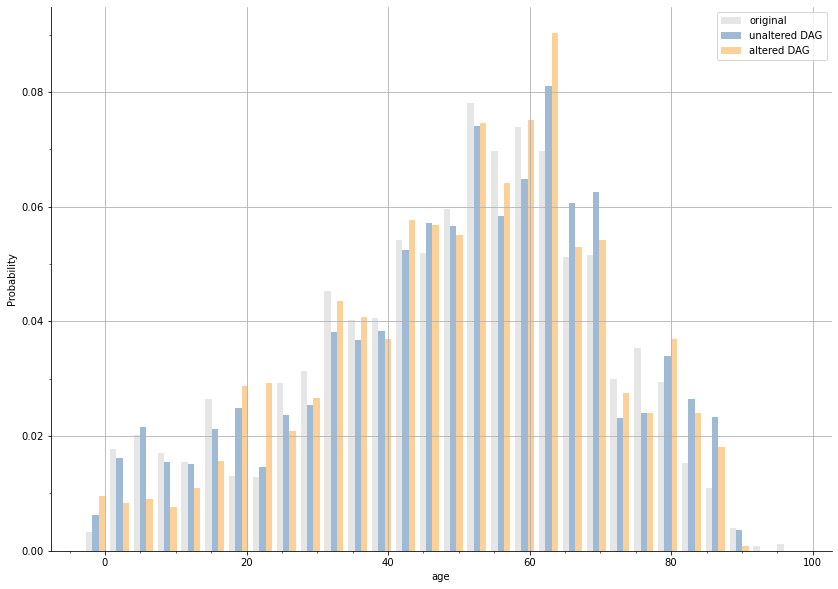

In [47]:
vals = [df.age for df in dfs]
weights = [np.ones_like(v)/len(v) for v in vals]

plt.figure(figsize=(14,10))

ax = plt.subplot(111)

bins=np.histogram(np.hstack((vals[0],vals[1], vals[2])), bins=30)[1]

ax.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(5))

ax.yaxis.set_major_locator(MultipleLocator(0.02))
ax.yaxis.set_minor_locator(MultipleLocator(0.01))

test = plt.hist(vals,
         bins=bins, weights = weights,
         label=labels,
         color=colors)

plt.legend()
plt.xlabel('age')
plt.ylabel('Probability')

#tikzplotlib.clean_figure()
#tikzplotlib.save("./notebooks/results/figures/age.tex")

In [48]:
delta = test[1][1]-test[1][0]

str_ = ''

for i in range(len(test[0][0])):
    str_ += '{} '.format(i*delta)
    
    for m in range(3):
        str_ += '{} '.format(test[0][m][i])
    str_ += '\n'
    
print(str_)

0.0 0.0032478441034830344 0.0061597043341919625 0.00951954306193302 
3.3666666666666667 0.017695150632769538 0.01623922051741506 0.008399596819352612 
6.733333333333333 0.020271026990704613 0.02150296785754308 0.009071564564900821 
10.1 0.01702318288722182 0.015567252771867324 0.0076156344495464726 
13.466666666666667 0.015455258147609278 0.015119274274835164 0.010863478553029715 
16.833333333333332 0.026542725949155077 0.02116698398476924 0.015679247396125362 
20.2 0.013103371038190481 0.02497480120954254 0.028782618434315836 
23.566666666666666 0.012879381789674405 0.014671295777803017 0.029342591555606035 
26.933333333333334 0.029230596931347996 0.02363086571844608 0.020831000111995124 
30.3 0.031358494792250724 0.025422779706574694 0.026654720573413115 
33.666666666666664 0.04535782282450551 0.03807817224773302 0.0435659088363769 
37.03333333333333 0.04020607010863572 0.036734236756636535 0.04076604322992591 
40.4 0.0406540486056679 0.0383021614962491 0.03695822600515264 
43.766666

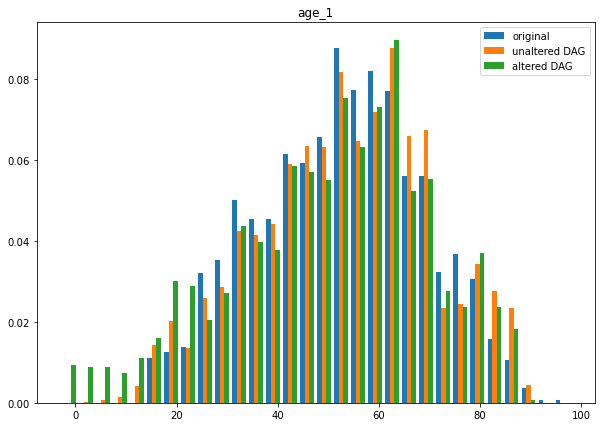

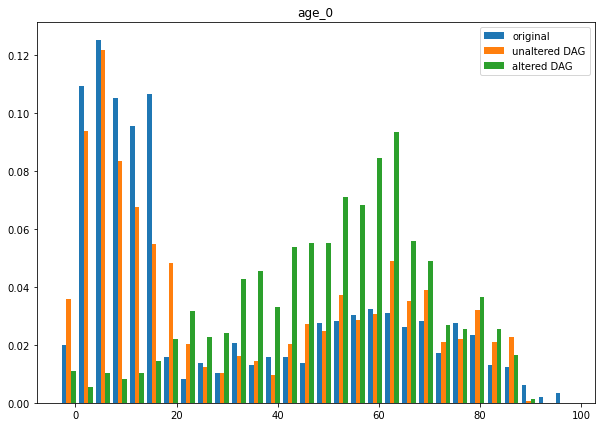

In [49]:
tests = []

for i in dfs[0].license.unique():
    vals = [df[df.license == i].age for df in dfs]
    weights = [np.ones_like(v)/len(v) for v in vals]

    plt.figure(figsize=(10,7))

    test = plt.hist(vals,
             bins=bins, weights = weights,
             label=labels)

    tests.append(test)
    
    plt.legend()

    plt.title('age_' + str(i))

In [50]:
for test in tests:

    delta = test[1][1]-test[1][0]

    str_ = ''

    for i in range(len(test[0][0])):
        str_ += '{} '.format(i*delta)

        for m in range(3):
            str_ += '{} '.format(test[0][m][i])
        str_ += '\n'

    print(str_)

0.0 0.0 0.0 0.009228300120369145 
3.3666666666666667 0.0 0.0001352447930754666 0.008960813160358455 
6.733333333333333 0.0 0.000676223965377333 0.008827069680353107 
10.1 0.0 0.0014876927238301316 0.007489634880299523 
13.466666666666667 0.0 0.00419258858533947 0.010966965360438424 
16.833333333333332 0.011091808098356293 0.014200703272923942 0.01591547412063625 
20.2 0.012561806761993827 0.020151474168244445 0.030092283001203 
23.566666666666666 0.013764532941333597 0.013524479307546605 0.028888591681154874 
26.933333333333334 0.03220633435787801 0.025967000270490398 0.020462752440819687 
30.3 0.035413604169452356 0.0285366513389248 0.027149926441088185 
33.666666666666664 0.05011359080582879 0.04260210981877399 0.04373411796175289 
37.03333333333333 0.04543632233061812 0.041384906681094735 0.03985555704159713 
40.4 0.04543632233061812 0.04422504733567967 0.03771566136150384 
43.766666666666666 0.06160630763062022 0.0591019745739817 0.058445900762330416 
47.13333333333333 0.0593344915